<center>
<h1 style="color:red; font-size:70px;"> Esercitazione 7</h1>

In questo notebook sono riportati gli esercizi per la cui soluzione è necessario il codice **md.7**: i grafici qui presenti sono in python, ma nella cartella è possibile trovarne di analoghi fatti con gnuplot. Sono anche riportati i comandi per creare i plot, salvati in dei file '.gnuplot'. 

Per eseguire il notebook sui computer di laboratorio, è necessario lanciare il seguente comando e selezionare il corretto kernel python.

<center>

`module load python3/anaconda`
<center>

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

from scipy.stats import norm
from scipy.optimize import curve_fit

Quando si vogliono studiare le proprietà di un certo sistema all'equilibrio termodinamico è necessario scartare la prima fase di transiente, in cui si ha la termalizzazione dello stesso, ed inoltre che la simulazione sia abbastanza lunga da campionare esaustivamente l'intero spazio delle fasi. Sebbene non sia banale verificare tali requisiti, esistono alcune condizioni che devono necessariamente essere rispettate all'equilibrio. Un rapido controllo riguarda la stazionarietà dei valori medi delle quantità di interesse, il che è abbastanza per diverse situazioni. Un altro controllo riguarda la validità del teorema di fluttuazione-dissipazione, che consente di collegare il calore specifico di un materiale alle fluttuazioni in energia del sistema stesso secondo

$$
c_v\,=\,\frac{1}{k_B T^2}\left(\left<E^2\right>\,-\,\left<E\right>^2\right)
$$

Scartare il transiente è inutile in simulazioni infinite, dato che la sua influenza sui dati in analisi diventerebbe trascurabile. Per simulazioni di durata realistica (stiamo parlando quindi di simulazioni finite) la presenza di una fase di termalizzazione comporta, se considerata, degli errori sistematici nel calcolo delle medie.

<center>
<h1 style="color:blue; font-size:55px;"> Esercizio 2.13</h1>

Nel caso si due traiettorie simulate in condizioni di temperatura leggermente discrepante è possibile costruire l'indicatore

$$
h\left(t\right)\,=\,\frac{\left<E^2\right>_t\,-\,\left<E\right>^2_t}{k_B T^2 c_v\left(t\right)},
$$

che tende ad uno nel momento in cui il sistema simulato raggiunge l'equilibrio termodinamico. Determinare la quantità introdotta in precedenza consente di valutare quale sia la durata simulativa adeguata e consente di stimare quale sia il tempo di equilibrazione, dato che è possibile eseguire un fit di h(t) con una funzione del tipo

$$
f\left(t\right)\,=\,1\,+\,a \exp{\left(-\frac{t}{\tau}\right)},
$$

dove uno dei due parametri è proprio il tempo caratteristico ricercato. L'obiettivo di questo esercizio è la determinazione di tale quantità per mezzo di due simulazioni, la prima effettuata a 19 K, mentre la seconda a 21 K.

In [3]:
kb = 0.0862
T = 21

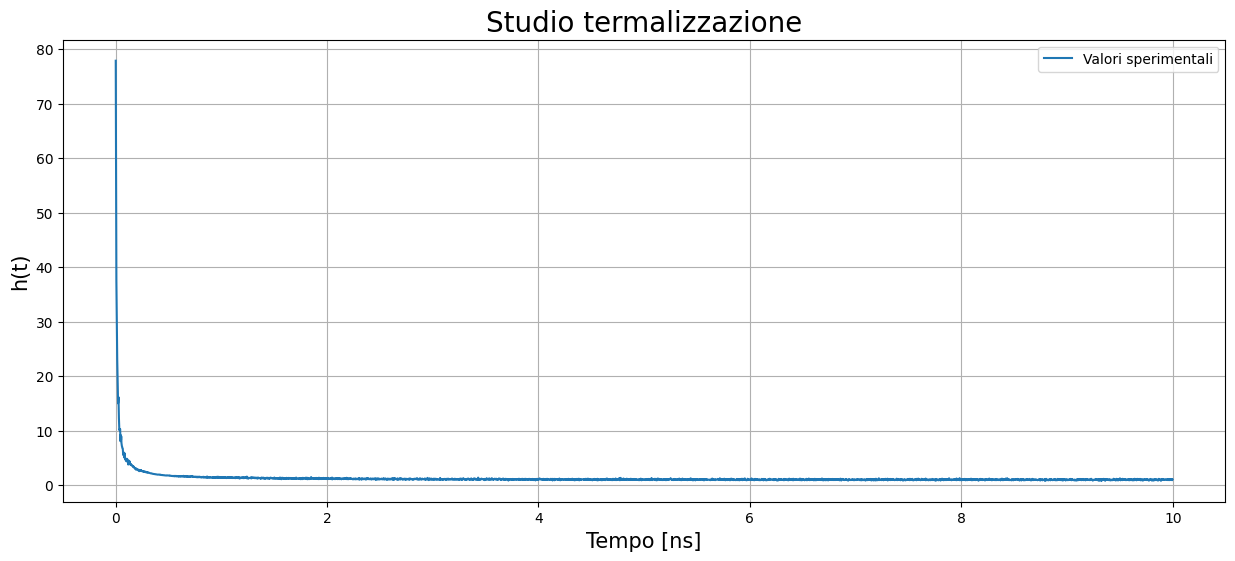

In [4]:
t19 = np.loadtxt('simT/simT_19.out')
t21 = np.loadtxt('simT/simT_21.out')

cv = (t21[:, 3] - t19[:, 3])/2

e2mean = np.zeros(len(cv))
emean2 = np.zeros(len(cv))

e2mean[0] = t21[0, 3]**2
emean2[0] = t21[0, 3]**2

for i in range(1, len(cv)):
    e2mean[i] = e2mean[i-1] * i/(i+1) + (t21[i, 3]**2)/(i+1)
    emean2[i] = np.mean(t21[0:i, 3])**2

h = (e2mean[1:-1] - emean2[1:-1])/(kb*T**2*cv[1:-1])

fig = plt.figure(figsize=(15, 6))

plt.plot(t19[1:-1, 0]/1000, h, label = 'Valori sperimentali')
plt.ylabel(r"h(t)", fontsize = 15)
plt.xlabel(r"Tempo [ns]", fontsize = 15)
plt.title(r"Studio termalizzazione", fontsize = 20)
plt.grid(True)
plt.legend(loc = 'best')

plt.show()

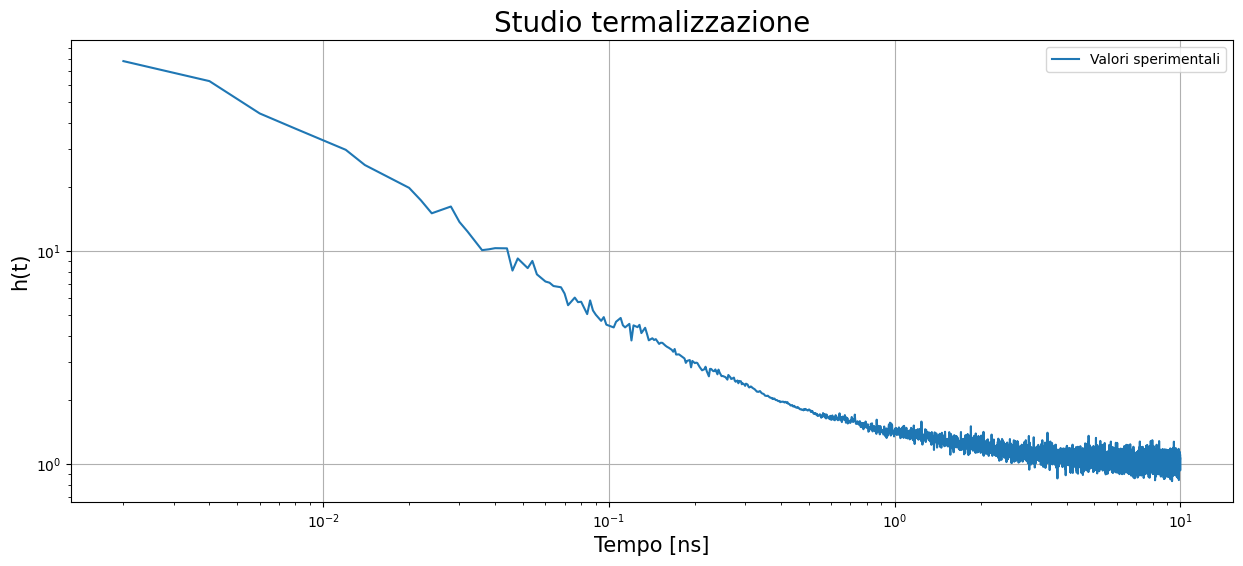

In [5]:
t19 = np.loadtxt('simT/simT_19.out')
t21 = np.loadtxt('simT/simT_21.out')

cv = (t21[:, 3] - t19[:, 3])/2

e2mean = np.zeros(len(cv))
emean2 = np.zeros(len(cv))

e2mean[0] = t21[0, 3]**2
emean2[0] = t21[0, 3]**2

for i in range(1, len(cv)):
    e2mean[i] = e2mean[i-1] * i/(i+1) + (t21[i, 3]**2)/(i+1)
    emean2[i] = np.mean(t21[0:i, 3])**2

h = (e2mean[1:-1] - emean2[1:-1])/(kb*T**2*cv[1:-1])

fig = plt.figure(figsize=(15, 6))

plt.loglog(t19[1:-1, 0]/1000, h, label = 'Valori sperimentali')
plt.ylabel(r"h(t)", fontsize = 15)
plt.xlabel(r"Tempo [ns]", fontsize = 15)
plt.title(r"Studio termalizzazione", fontsize = 20)
plt.grid(True)
plt.legend(loc = 'best')

plt.show()

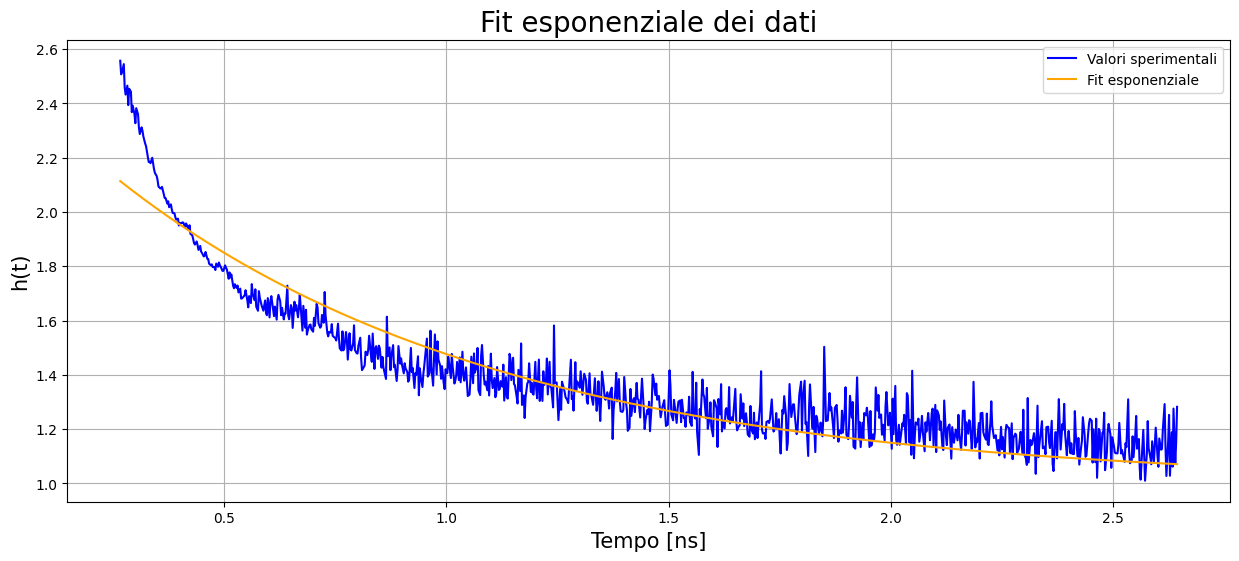

Parametri del fit:
 a = 1.5149, b = 0.8645


In [6]:
def exp_model(x, a, b):
    return 1 + a * np.exp(-x / b)


x_fit = t19[1:-1, 0] / 1000
y_fit = h


p0 = [1.0, 0.5]

params, covariance = curve_fit(exp_model, x_fit[100:1000], y_fit[100:1000], p0=p0)
a, b = params

y_model = exp_model(x_fit[100:1000], a, b)


plt.figure(figsize=(15, 6))
plt.plot(x_fit[100:1000], y_fit[100:1000], label='Valori sperimentali', color='blue')
plt.plot(x_fit[100:1000], y_model, label='Fit esponenziale', color='orange')
plt.xlabel("Tempo [ns]", fontsize=15)
plt.ylabel("h(t)", fontsize=15)
plt.title("Fit esponenziale dei dati", fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

print(f"Parametri del fit:\n a = {a:.4f}, b = {b:.4f}")


Notiamo che i parametri del fit sono:

$$
a \simeq 1.51
$$

$$
b \simeq 0.86
$$

Il parametro b è un tempo caratteristico, che definisce il tempo scala per l'equilibrio termico. Per un sistema all'equilibrio termico non servono due simulazioni a temperature differenti per valutare il calore specifico, infatti si può procedere con

$$
c_v\,=\,\frac{1}{k_B T^2}\left(\left<E^2\right>\,-\,\left<E\right>^2\right)
$$

Effettuo ora questo calcolo sia per la simulazione a diciannove che a ventuno Kelvin, prendendo in considerazione solo i dati prodotti dopo che sono passati 3b nanosecondi.

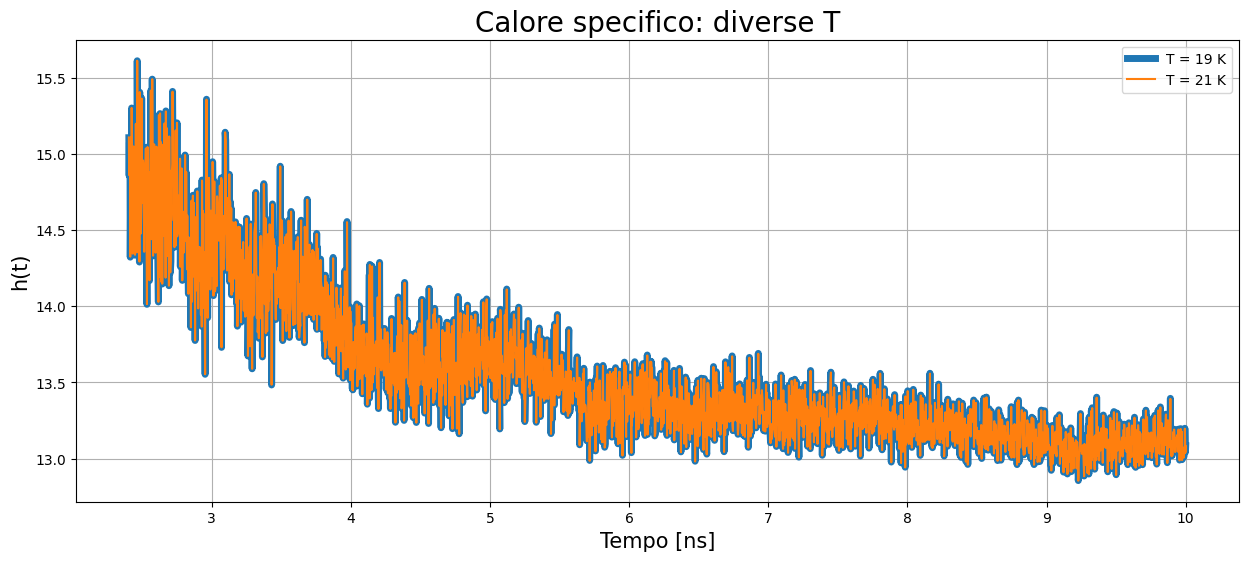

In [12]:
t19 = np.loadtxt('simT/simT_19.out')
t21 = np.loadtxt('simT/simT_21.out')

mask1 = t19[:, 0] > 2400
temp1 = t19[mask1, 0]
ene19 = t19[:, 3]

mask2 = t21[:, 0] > 2400
temp2 = t21[mask2, 0]
ene21 = t21[:, 3]

e2mean19 = np.zeros(len(ene19))
emean19 = np.zeros(len(ene19))
e2mean21 = np.zeros(len(ene21))
emean21 = np.zeros(len(ene21))

e2mean19[0] = ene19[0]**2
emean19[0] = ene19[0]**2
e2mean21[0] = ene21[0]**2
emean21[0] = ene21[0]**2

for i in range(1, len(ene19)):
    e2mean19[i] = e2mean19[i-1] * i/(i+1) + (ene19[i]**2)/(i+1)
    emean19[i] = np.mean(ene19[0:i])**2

    e2mean21[i] = e2mean21[i-1] * i/(i+1) + (ene21[i]**2)/(i+1)
    emean21[i] = np.mean(ene21[0:i])**2

cv19 = (e2mean19[mask1] - emean19[mask1])/(kb*19**2)
cv21 = (e2mean21[mask2] - emean21[mask2])/(kb*21**2)


fig = plt.figure(figsize=(15, 6))

plt.plot(temp1/1000, cv19, label = 'T = 19 K', linewidth = 5)
plt.plot(temp2/1000, cv21, label = 'T = 21 K')
plt.ylabel(r"h(t)", fontsize = 15)
plt.xlabel(r"Tempo [ns]", fontsize = 15)
plt.title(r"Calore specifico: diverse T", fontsize = 20)
plt.grid(True)
plt.legend(loc = 'best')

plt.show()